In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!apt-get install unrar

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unrar is already the newest version (1:6.1.5-1ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 30 not upgraded.


In [ ]:
!unrar x "/content/drive/MyDrive/train images.rar" "/content/train_images/"

Streaming output truncated to the last 5000 lines.
Extracting  /content/train_images/6/exp104580.jpg                         89%  OK 
Extracting  /content/train_images/6/exp104816.jpg                         89%  OK 
Extracting  /content/train_images/6/exp104829.jpg                         89%  OK 
Extracting  /content/train_images/6/exp104830.jpg                         89%  OK 
Extracting  /content/train_images/6/exp104832.jpg                         89%  OK 
Extracting  /content/train_images/6/exp104835.jpg                         89%  OK 
Extracting  /content/train_images/6/exp10484.jpg                          89%  OK 
Extracting  /content/train_images/6/exp10499.jpg                          89%  OK 
Extracting  /content/train_images/6/exp10522.jpg                          89%  OK 
Extracting  /content/train_images/6/exp105306.jpg                         89%  OK 
Extracting  /content/train_im

In [ ]:
!apt-get install tree
!tree /content/train_images/


Streaming output truncated to the last 5000 lines.
│   ├── exp44574.jpg
│   ├── exp44641.jpg
│   ├── exp44646.jpg
│   ├── exp44650.jpg
│   ├── exp44651.jpg
│   ├── exp44657.jpg
│   ├── exp44658.jpg
│   ├── exp44705.jpg
│   ├── exp44774.jpg
│   ├── exp44798.jpg
│   ├── exp44819.jpg
│   ├── exp44841.jpg
│   ├── exp44865.jpg
│   ├── exp44962.jpg
│   ├── exp45040.jpg
│   ├── exp45046.jpg
│   ├── exp45049.jpg
│   ├── exp4504.jpg
│   ├── exp4507.jpg
│   ├── exp45083.jpg
│   ├── exp45096.jpg
│   ├── exp45104.jpg
│   ├── exp45105.jpg
│   ├── exp45107.jpg
│   ├── exp45132.jpg
│   ├── exp45141.jpg
│   ├── exp45146.jpg
│   ├── exp45160.jpg
│   ├── exp45208.jpg
│   ├── exp452.jpg
│   ├── exp45323.jpg
│   ├── exp4532.jpg
│   ├── exp45351.jpg
│   ├── exp4535.jpg
│   ├── exp45371.jpg
│   ├── exp45403.jpg
│   ├── exp45405.jpg
│   ├── exp45411.jpg
│   ├── exp45479.jpg
│   ├── exp454.jpg
│   ├── exp45508.jpg
│   ├── exp45514.jpg
│   ├── exp45515.jpg
│   ├── exp45584.jpg
│   ├── exp45585.jpg
│   ├── exp4

In [ ]:
import os

base_path='/content/train_images'

folders = [f for f in os.listdir(base_path) if os.path.isdir(os.path.join(base_path, f))]
print("Folders found:", folders)


Folders found: ['6', '-', '7', '2', '3', '9', 'times', '0', '5', '8', '4', '1', '+']


In [ ]:
import numpy as np
import cv2
from PIL import Image
from matplotlib import pyplot as plt
%matplotlib inline
import os
from os import listdir
from os.path import isfile, join
import pandas as pd

import pickle

In [ ]:
def load_images_from_folder(folder):
    train_data=[]
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename),cv2.IMREAD_GRAYSCALE)
        img=~img
        if img is not None:
            ret,thresh=cv2.threshold(img,127,255,cv2.THRESH_BINARY)

            ctrs,ret=cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
            cnt=sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])
            w=int(28)
            h=int(28)
            maxi=0
            for c in cnt:
                x,y,w,h=cv2.boundingRect(c)
                maxi=max(w*h,maxi)
                if maxi==w*h:
                    x_max=x
                    y_max=y
                    w_max=w
                    h_max=h
            im_crop= thresh[y_max:y_max+h_max+10, x_max:x_max+w_max+10]
            im_resize = cv2.resize(im_crop,(28,28))
            im_resize=np.reshape(im_resize,(784,1))
            train_data.append(im_resize)
    return train_data

In [ ]:
data=[]
data=load_images_from_folder('/content/train_images/-')
len(data)
for i in range(0,len(data)):
    data[i]=np.append(data[i],['10'])

print(len(data))

4152


In [ ]:
data11=load_images_from_folder('/content/train_images/+')

for i in range(0,len(data11)):
    data11[i]=np.append(data11[i],['11'])
data=np.concatenate((data,data11))
print(len(data))

8184


In [ ]:
data0=load_images_from_folder('/content/train_images/0')
for i in range(0,len(data0)):
    data0[i]=np.append(data0[i],['0'])
data=np.concatenate((data,data0))
print(len(data))

12018


In [ ]:
data1=load_images_from_folder('/content/train_images/1')
for i in range(0,len(data1)):
    data1[i]=np.append(data1[i],['1'])
data=np.concatenate((data,data1))
print(len(data))

16074


In [ ]:
data2=load_images_from_folder('/content/train_images/2')
for i in range(0,len(data2)):
    data2[i]=np.append(data2[i],['2'])
data=np.concatenate((data,data2))
print(len(data))

20334


In [ ]:
data3=load_images_from_folder('/content/train_images/3')
for i in range(0,len(data3)):
    data3[i]=np.append(data3[i],['3'])
data=np.concatenate((data,data3))
print(len(data))

23850


In [ ]:
data4=load_images_from_folder('/content/train_images/4')
for i in range(0,len(data4)):
    data4[i]=np.append(data4[i],['4'])
data=np.concatenate((data,data4))
print(len(data))

27882


In [ ]:
data5=load_images_from_folder('/content/train_images/5')
for i in range(0,len(data5)):
    data5[i]=np.append(data5[i],['5'])
data=np.concatenate((data,data5))
print(len(data))

31426


In [ ]:
data6=load_images_from_folder('/content/train_images/6')
for i in range(0,len(data6)):
    data6[i]=np.append(data6[i],['6'])
data=np.concatenate((data,data6))
print(len(data))

34543


In [ ]:
data7=load_images_from_folder('/content/train_images/7')
for i in range(0,len(data7)):
    data7[i]=np.append(data7[i],['7'])
data=np.concatenate((data,data7))
print(len(data))

37451


In [ ]:
data8 = load_images_from_folder('/content/train_images/8')
for i in range(0,len(data8)):
    data8[i]=np.append(data8[i],['8'])
data=np.concatenate((data,data8))
print(len(data))

40518


In [ ]:
data9 = load_images_from_folder('/content/train_images/9')
for i in range(0,len(data9)):
    data9[i]=np.append(data9[i],['9'])
data=np.concatenate((data,data9))
print(len(data))

44254


In [ ]:
data12 = load_images_from_folder('/content/train_images/times')
for i in range(0,len(data12)):
    data12[i]=np.append(data12[i],['12'])
data=np.concatenate((data,data12))
print(len(data))

47504


In [ ]:
df=pd.DataFrame(data,index=None)
df.to_csv('train_handwritten.csv',index=False)

Model Building

In [ ]:
data = pd.read_csv('/content/train_handwritten.csv',index_col=False)
labels = data[['784']]

In [ ]:
data.drop(data.columns[[784]],axis=1,inplace=True)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,86,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,86,255,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
np.random.seed(1212)
import keras
from keras.models import Model
from keras.layers import *
from keras import optimizers
from keras.layers import Input, Dense
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras import backend as K
K.image_data_format()

'channels_last'

In [ ]:
labels=np.array(labels)

In [ ]:
cat=to_categorical(labels,num_classes=13)

In [ ]:
print(cat[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [ ]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,86,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,86,255,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data.shape

(47504, 784)

In [ ]:
temp=data.to_numpy()

In [ ]:
X_train=temp.reshape(temp.shape[0], 28, 28, 1)

In [ ]:
temp.shape[0]

47504

In [ ]:
X_train.shape

(47504, 28, 28, 1)

In [ ]:
l=[]
for i in range(47504):
    l.append(np.array(data[i:i+1]).reshape(1,28,28))

In [ ]:
np.random.seed(7)

In [ ]:
len(l[0])

1

In [ ]:
X_train.shape

(47504, 28, 28, 1)

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=(28, 28,1), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(15, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(13, activation='softmax'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 15)          │           4,335 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 15)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 6, 6, 15)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 540)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          69,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 50)                  │           6,450 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 13)                  │             663 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 81,016 (316.47 KB)

 Trainable params: 81,016 (316.47 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
!pip install pydot
!apt-get install graphviz -y

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 30 not upgraded.


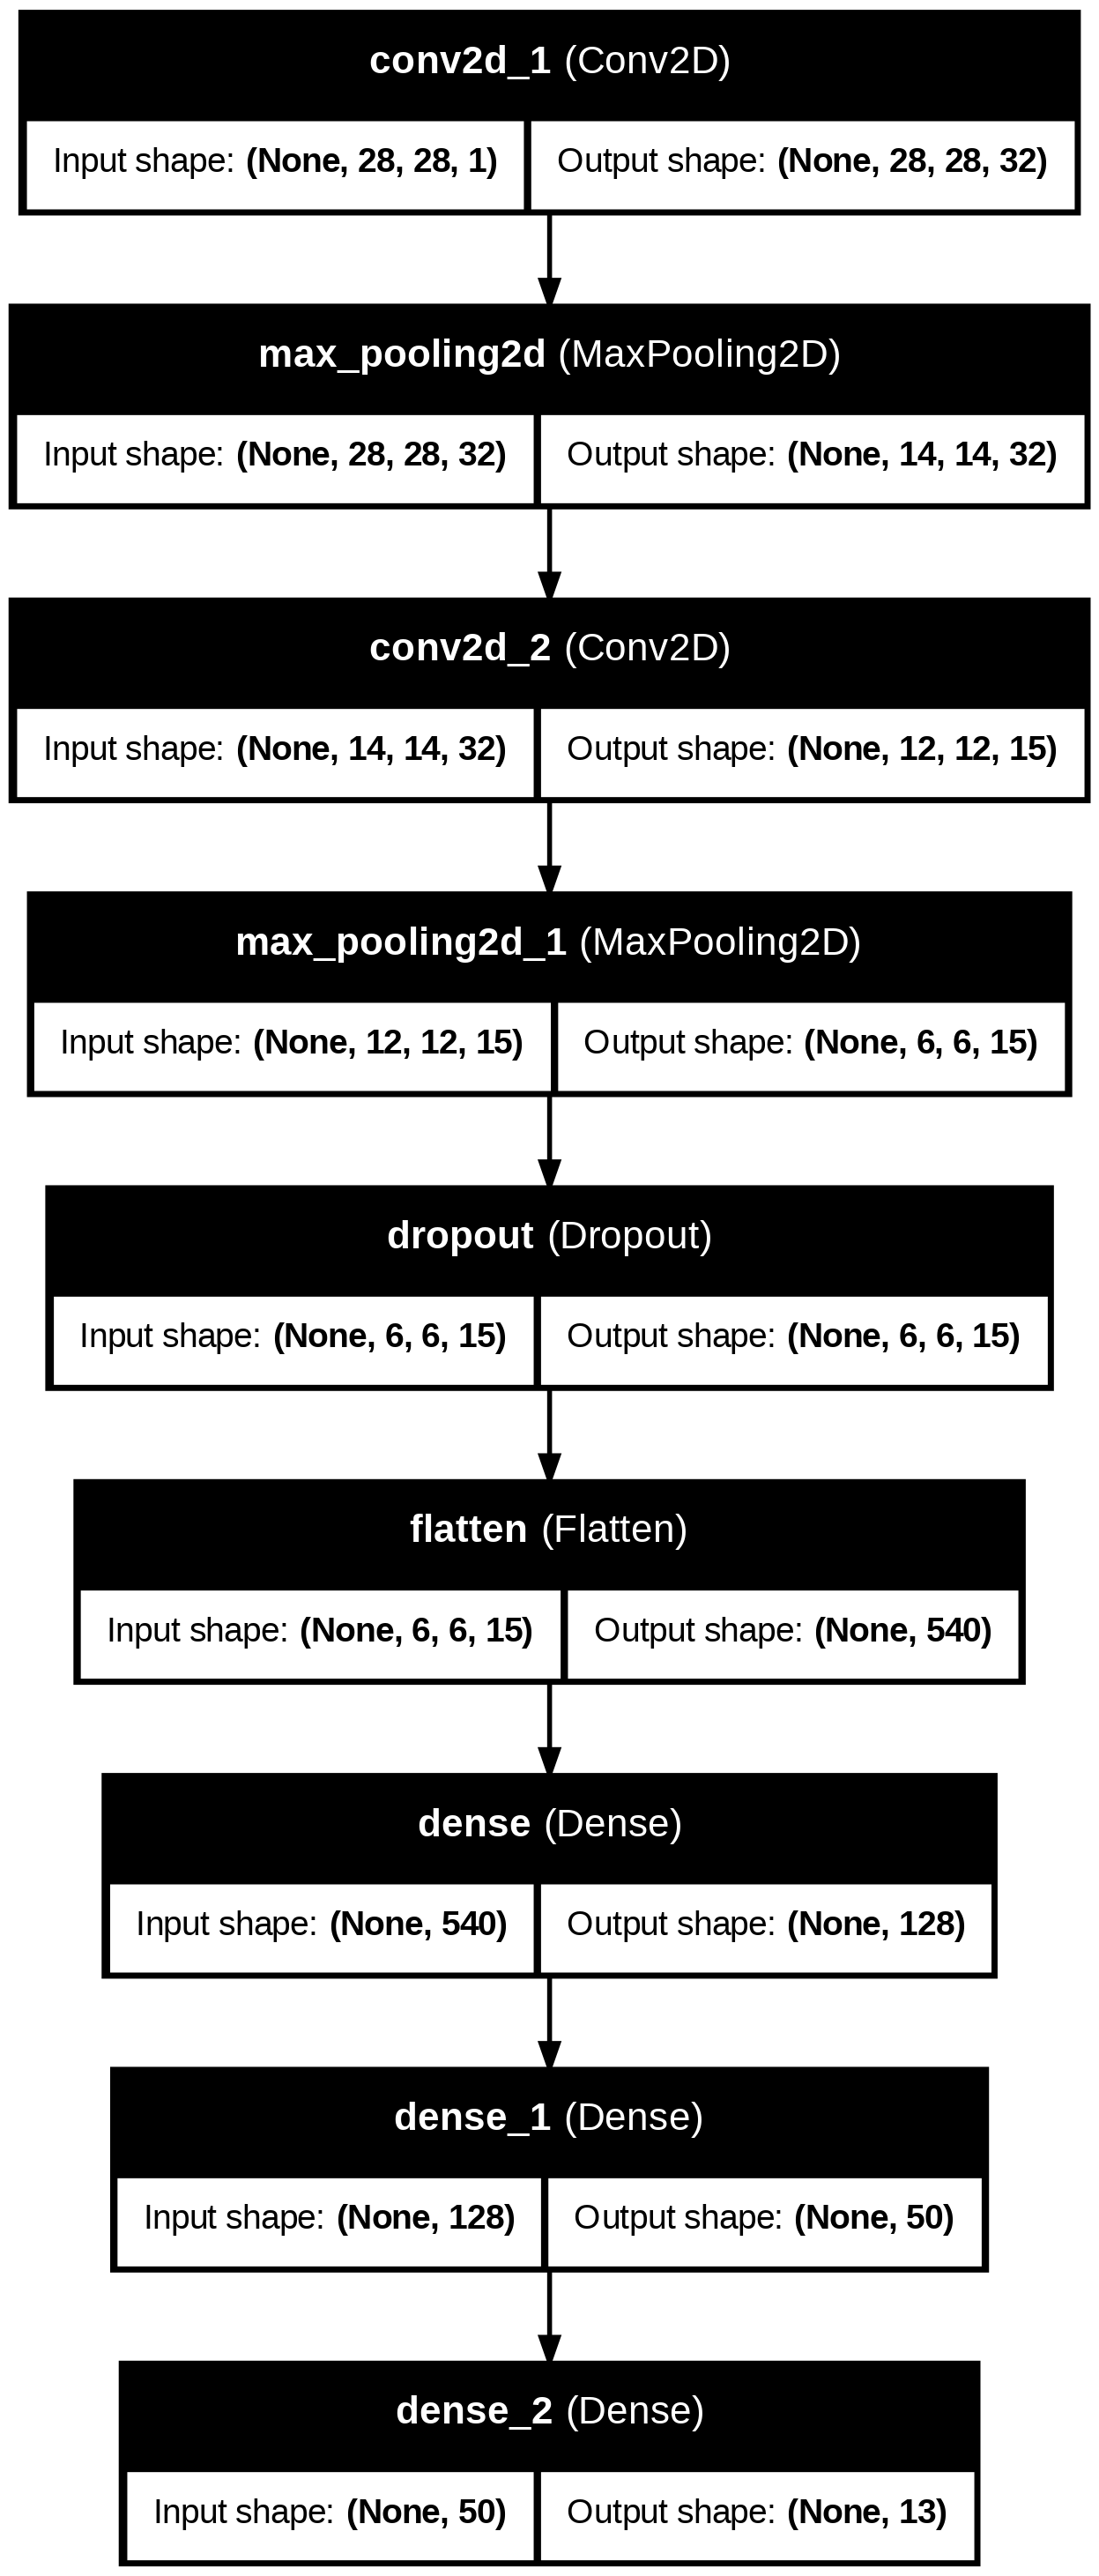

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
from IPython.display import Image
Image(filename='model_plot.png')

In [ ]:
model.fit(X_train, cat, epochs=25, batch_size=200,shuffle=True,verbose=1)

Epoch 1/25
238/238 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.4968 - loss: 2.9062
Epoch 2/25
238/238 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9211 - loss: 0.2644
Epoch 3/25
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9565 - loss: 0.1414
Epoch 4/25
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9696 - loss: 0.1016
Epoch 5/25
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9793 - loss: 0.0699
Epoch 6/25
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9836 - loss: 0.0542
Epoch 7/25
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9866 - loss: 0.0456
Epoch 8/25
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9872 - loss: 0.0411
Epoch 9/25
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9902 - loss: 0.0321
Epoch 10/25
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9900 - loss: 0.0306
Epoch 11/25
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9919 - loss: 0.0260
Epoch 12/25
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/ste

In [ ]:
import pickle
pickle.dump(model, open('model.pkl', 'wb'))
model.save_weights("model_final.weights.h5")

In [ ]:
!ls -lh /content

total 81M
drwx------  6 root root 4.0K Apr  5 16:52 drive
-rw-r--r--  1 root root 988K Apr  5 18:38 model_final.weights.h5
-rw-r--r--  1 root root 994K Apr  5 18:38 model.pkl
-rw-r--r--  1 root root 181K Apr  5 18:19 model_plot.png
drwxr-xr-x  1 root root 4.0K Apr  3 13:37 sample_data
-rw-r--r--  1 root root  79M Apr  5 17:19 train_handwritten.csv
drwxr-xr-x 15 root root 4.0K Apr  5 17:03 train_images


In [ ]:
!mkdir -p /content/drive/MyDrive/model
model.save('/content/drive/MyDrive/model/cnn_model.h5')

In [ ]:
model.save('/content/drive/MyDrive/model/cnn_math.keras')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
from tensorflow.keras.models import load_model

model_path = '/content/drive/My Drive/model/cnn_math.keras'

model = load_model(model_path)
print("Model loaded successfully!")


Mounted at /content/drive
Model loaded successfully!


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
import cv2
import numpy as np
# load image
img = cv2.imread('/content/tests2.jpg', cv2.IMREAD_GRAYSCALE)

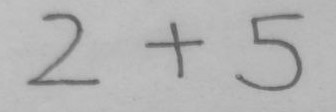

In [ ]:
# show image
from google.colab.patches import cv2_imshow
cv2_imshow(img)

Contours detected after full vertical merging: 3


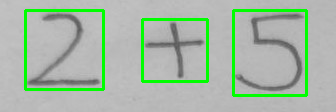

In [ ]:
if img is None:
    print("Image not loaded. Check path.")
else:
    # invert image: digits black on white background
    inverted = ~img

    # binary threshold
    _, binary = cv2.threshold(inverted, 127, 255, cv2.THRESH_BINARY)

    # dilation to connect digit parts
    kernel = np.ones((5, 5), np.uint8)
    dilated = cv2.dilate(binary, kernel, iterations=2)

    # get contours
    contours, _ = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    rects = [cv2.boundingRect(c) for c in contours]

    # sort left to right
    rects = sorted(rects, key=lambda x: x[0])

    # merge close horizontally or all vertically aligned contours
    merged = []
    for r in rects:
        x, y, w, h = r
        merged_flag = False
        for i in range(len(merged)):
            x2, y2, w2, h2 = merged[i]

            # horizontally overlapping or close (5px buffer)
            horizontally_close = not (x > x2 + w2 + 5 or x + w + 5 < x2)

            # vertically aligned if centers are aligned (regardless of y-distance)
            cx1 = x + w // 2
            cx2 = x2 + w2 // 2
            vertically_aligned = abs(cx1 - cx2) <= max(w, w2)  # same column area

            if horizontally_close or vertically_aligned:
                nx = min(x, x2)
                ny = min(y, y2)
                nw = max(x + w, x2 + w2) - nx
                nh = max(y + h, y2 + h2) - ny
                merged[i] = (nx, ny, nw, nh)
                merged_flag = True
                break

        if not merged_flag:
            merged.append((x, y, w, h))

    # Draw merged boxes
    output = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
    for x, y, w, h in merged:
        cv2.rectangle(output, (x, y), (x + w, y + h), (0, 255, 0), 2)

    print("Contours detected after full vertical merging:", len(merged))
    cv2_imshow(output)


In [ ]:
#done after experiement (working correct for 2*4,2+5)
train_data = []
bounding_boxes = []

# sort merged boxes left to right
merged = sorted(merged, key=lambda b: b[0])

for (x, y, w, h) in merged:
    # crop from the binary image
    cropped = binary[y:y+h, x:x+w]

    # resize to 28x28 for model input
    resized = cv2.resize(cropped, (28, 28))
    reshaped = np.reshape(resized, (28, 28, 1))

    train_data.append(reshaped)
    bounding_boxes.append((x, y, w, h))


In [ ]:
equation=''
for i in range(len(train_data)):
    train_data[i]=np.array(train_data[i])
    train_data[i]=train_data[i].reshape(1,28,28,1)
    result=np.argmax(model.predict(train_data[i]), axis=-1)
    if(result[0]==10):
        equation = equation +'-'
    if(result[0]==11):
        equation = equation +'+'
    if(result[0]==12):
        equation = equation +'*'
    if(result[0]==0):
        equation = equation +'0'
    if(result[0]==1):
        equation = equation +'1'
    if(result[0]==2):
        equation = equation +'2'
    if(result[0]==3):
        equation = equation +'3'
    if(result[0]==4):
        equation = equation +'4'
    if(result[0]==5):
        equation = equation +'5'
    if(result[0]==6):
        equation = equation +'6'
    if(result[0]==7):
        equation = equation +'7'
    if(result[0]==8):
        equation = equation +'8'
    if(result[0]==9):
        equation = equation +'9'

print(equation)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
2+5


In [ ]:
eval(equation)

7

In [ ]:
result=str(eval(equation))
full_output = equation+"="+result
print(full_output)

2+5=7
